In [ ]:
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install scipy

In [ ]:
import math
import numpy as np
import copy
import matplotlib.pyplot as plt

In [2]:
import time

Result of Nelder-Mead algorithm: 
Best poits is: None


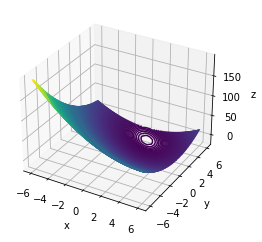

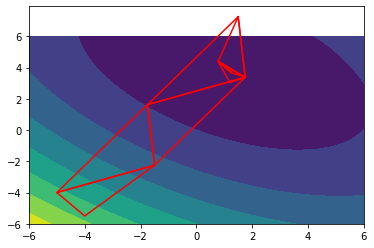

In [3]:
class Vector(object):
    def __init__(self, x, y):
        """ Create a vector, example: v = Vector(1,2) """
        self.x = x
        self.y = y
    def __repr__(self):
        return "({0}, {1})".format(self.x, self.y)
    def __add__(self, other):
        x = self.x + other.x
        y = self.y + other.y
        return Vector(x, y)
    def __sub__(self, other):
        x = self.x - other.x
        y = self.y - other.y
        return Vector(x, y)
    def __rmul__(self, other):
        x = self.x * other
        y = self.y * other
        return Vector(x, y)
    def __truediv__(self, other):
        x = self.x / other
        y = self.y / other
        return Vector(x, y)
    def c(self):
        return (self.x, self.y)
# objective function
def f(point):
    x, y = point
    return x**2 + x*y + y**2 - 6*x - 9*y

def f1(x,y):
    return x**2 + x*y + y**2 - 6*x - 9*y

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f1(X, Y)

fig1 = plt.figure()

ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 500)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

fig2 = plt.figure()
cset = plt.contourf(X, Y, Z)



def mplot(a,b,c):
    plt.plot([a[0],b[0],c[0],a[0]],[a[1],b[1],c[1],a[1]],'r')


def nelder_mead(alpha=1, beta=0.5, gamma=2, maxiter=10):
    # initialization
    v1 = Vector(-6, -6)
    v2 = Vector(-5, -4)
    v3 = Vector(-4, -5.5)
    for i in range(maxiter):
        adict = {v1:f(v1.c()), v2:f(v2.c()), v3:f(v3.c())}
        points = sorted(adict.items(), key=lambda x: x[1])
        b = points[0][0]
        g = points[1][0]
        w = points[2][0]
        mid = (g + b)/2
        # reflection
        xr = mid + alpha * (mid - w)
        if f(xr.c()) < f(g.c()):
            w = xr
        else:
            if f(xr.c()) < f(w.c()):
                w = xr
            c = (w + mid)/2
            if f(c.c()) < f(w.c()):
                w = c
        if f(xr.c()) < f(b.c()):
            # expansion
            xe = mid + gamma * (xr - mid)
            if f(xe.c()) < f(xr.c()):
                w = xe
            else:
                w = xr
        if f(xr.c()) > f(g.c()):
            # contraction
            xc = mid + beta * (w - mid)
            if f(xc.c()) < f(w.c()):
                w = xc
        # update points
        v1 = w
        v2 = g
        v3 = b

        v1s=str(v1)
        for j in range(len(v1s)):
            if v1s[j]==',':
                indeks=j
        v1n=[]
        v1n.append(float(v1s[1:indeks]))
        v1n.append(float(v1s[indeks+2:len(v1s)-1]))        

        v2s=str(v2)
        for j in range(len(v2s)):
            if v2s[j]==',':
                indeks=j
        v2n=[]
        v2n.append(float(v2s[1:indeks]))
        v2n.append(float(v2s[indeks+2:len(v2s)-1]))  
        
        v3s=str(v3)
        for j in range(len(v3s)):
            if v3s[j]==',':
                indeks=j
        v3n=[]
        v3n.append(float(v3s[1:indeks]))
        v3n.append(float(v3s[indeks+2:len(v3s)-1])) 
        
        mplot(v1n,v2n,v3n)


print("Result of Nelder-Mead algorithm: ")
xk = nelder_mead()
print("Best poits is: %s"%(xk))